In [198]:
# !pip install keras

**TASKS**

In [199]:
# Import OS environment variables and other supporting libraries like Pandas, NumPy, TensorFlow.
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [200]:
#csv file
data= pd.read_csv("/content/Admission_Predict_A3.csv")

In [201]:
# scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [202]:
# list(data.columns)

In [203]:

features_data = data.drop(['Chance of Admit ','Serial No.'],axis = 1)
y= data['Chance of Admit ']


In [204]:
scaled = scaler.fit(features_data)
X_scaled = scaled.transform(features_data)
# train_x,test_x,train_y,test_y = train_test_split(scale_train, df.iloc[:,-1])
print(X_scaled)

[[ 1.81923762  1.77886545  0.77558214 ...  1.09894429  1.77680627
   0.88640526]
 [ 0.66714832 -0.03160087  0.77558214 ...  1.09894429  0.48585943
   0.88640526]
 [-0.0418297  -0.52536441 -0.09979274 ...  0.01730621 -0.95404281
   0.88640526]
 ...
 [ 1.19888185  2.10804114  1.65095702 ...  1.63976333  1.62785086
   0.88640526]
 [-0.39631872 -0.68995225  0.77558214 ...  1.63976333 -0.24236699
  -1.12815215]
 [ 0.93301508  0.95592621  0.77558214 ...  1.09894429  0.76721964
  -1.12815215]]


In [205]:

from sklearn.model_selection import train_test_split
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
# len(y_train)

In [206]:
# convert the data into Tenserflow tensors
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor=tf.constant(y_train.values.reshape(-1,1), dtype=tf.float32)
X_test_tensor= tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor=tf.constant(y_test.values.reshape(-1,1), dtype=tf.float32)


In [207]:
# Initialise weight/bias
weights = tf.Variable(tf.random.normal(shape=(X_train_tensor.shape[1], 1)), name='weights')
bias = tf.Variable(tf.zeros(shape=(1,)), name='bias')

# Define the linear regression model
def lin_regression(x):
    return tf.matmul(x, weights) + bias

# Define the mean squared error loss function
def mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))



In [208]:
# required parameters
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training loop
epochs = 1000

In [209]:
for epoch in range(epochs):
  with tf.GradientTape() as tape:
    y_pred = lin_regression(X_train_tensor)
    loss = mse(y_train_tensor, y_pred)
  gradients = tape.gradient(loss, [weights, bias])
  optimizer.apply_gradients(zip(gradients, [weights, bias]))


In [210]:
print(f"Final Loss for training dataset is {loss}")

Final Loss for training dataset is 0.003930042963474989


In [211]:
test_predictions = lin_regression(X_test_tensor)
test_loss = mse(y_test_tensor, test_predictions)

print(f'\nEvaluation on Testing Data - Mean Squared Error: {test_loss.numpy()}')




Evaluation on Testing Data - Mean Squared Error: 0.0044480725191533566


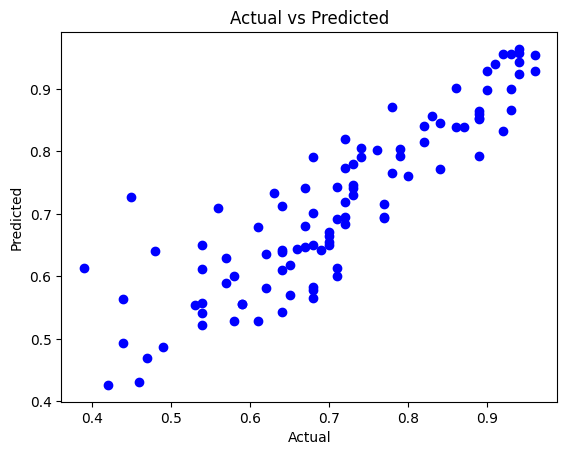

In [212]:
plt.scatter(y_test_tensor, test_predictions, color='blue')
# plt.plot([min(y_test_tensor), max(y_test_tensor)], [min(y_test_tensor), max(y_test_tensor)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

 **Logistic Regression- Using Dense Layer with softmax activation**

In [213]:
bin_edges = [0.3, 0.5, 0.7, 1]
bin_labels = ['low', 'medium', 'high']
data['Admission_Level'] = pd.cut(data['Chance of Admit '], bins=bin_edges, labels=bin_labels, include_lowest=True)
features_data = data.drop(['Chance of Admit ','Serial No.','Admission_Level'],axis = 1)
label_mapping = {'low': 0, 'medium': 1, 'high': 2}
data['Admission_Level'] = data['Admission_Level'].map(label_mapping)

y= data['Admission_Level']

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(features_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Y_train_encode = tf.keras.utils.to_categorical(Y_train)
Y_test_encode = tf.keras.utils.to_categorical(Y_test)

In [215]:
def model_return(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model_return(0.01)

class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 50 == 0:
            accuracy = logs.get('accuracy')
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Accuracy: {accuracy * 100:.2f}%')

model = model_return(0.01)

# Attach the custom callback to the fit method
history = model.fit(X_train_scaled, Y_train_encode, epochs=1000, verbose=0, callbacks=[PrintAccuracy()], validation_data=(X_test_scaled, Y_test_encode))


Epoch 50/1000, Accuracy: 78.50%
Epoch 100/1000, Accuracy: 78.75%
Epoch 150/1000, Accuracy: 79.00%
Epoch 200/1000, Accuracy: 79.25%
Epoch 250/1000, Accuracy: 79.25%
Epoch 300/1000, Accuracy: 80.00%
Epoch 350/1000, Accuracy: 80.25%
Epoch 400/1000, Accuracy: 80.75%
Epoch 450/1000, Accuracy: 81.00%
Epoch 500/1000, Accuracy: 81.25%
Epoch 550/1000, Accuracy: 81.75%
Epoch 600/1000, Accuracy: 81.75%
Epoch 650/1000, Accuracy: 81.75%
Epoch 700/1000, Accuracy: 81.50%
Epoch 750/1000, Accuracy: 81.50%
Epoch 800/1000, Accuracy: 81.75%
Epoch 850/1000, Accuracy: 81.75%
Epoch 900/1000, Accuracy: 81.75%
Epoch 950/1000, Accuracy: 81.75%
Epoch 1000/1000, Accuracy: 81.75%


In [216]:
# Assuming you have trained the model using the 'history' object
# and X_test_scaled, Y_test_one_hot are the scaled features and one-hot encoded labels for the test set

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test_encode, verbose=0)
print(f'Test Loss:{test_loss} \nTest Accuracy: {test_accuracy * 100}%')


Test Loss:0.48217490315437317 
Test Accuracy: 81.00000023841858%


**Why we used SoftMax?**

Softmax activation is beneficial because it transforms the raw output of a neural network into probabilities. These probabilities represent the likelihood of the input belonging to each class(so used in multi class classification)

**Logistic- By custom definition**

In [217]:

# X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float64)
# y_train_tensor = tf.constant(Y_train.values.reshape(-1, 1), dtype=tf.float64)
# X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float64)
# y_test_tensor = tf.constant(Y_test.values.reshape(-1, 1), dtype=tf.float64)


In [218]:
# optimizer = tf.optimizers.SGD(0.01)

In [219]:
# train_data = train_data.batch(64)  # Adjust batch size as needed

#  train_data=tf.data.Dataset.from_tensor_slices((X_train,Y_train))

#  train_data=train_data.repeat().shuffle(5000).batch(256).prefetch(1)


In [220]:
# W = tf.Variable(tf.random.normal(shape=(X_train_tensor.shape[1], 3)), name='weights')
# b = tf.Variable(tf.zeros(shape=(3,)), name='bias')

# def logistic_regression(x):
#     x = tf.cast(x, dtype=tf.float64)  # Cast to double if needed
#     return tf.nn.softmax(tf.matmul(x, W) + b)
# # # def cross_entropy(y_pred, y_true):
# def cross_entropy(y_pred, y_true):
#     y_true = tf.cast(y_true, dtype=tf.int64)  # Cast y_true to int64
#     y_true = tf.one_hot(y_true, depth=3)  # Adjust 3 based on your number of classes
#     y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
#     return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# def accuracy(y_pred, y_true):
#   y_true = tf.cast(y_true, dtype=tf.int64)  # Cast to the appropriate integer type
#   correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
#   return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# optimizer = tf.optimizers.SGD(0.01)

# def run_optimization(x, y):

# # Wrap computation inside a GradientTape for automatic differentiation.

#     with tf.GradientTape() as g:

#         pred = logistic_regression(x)

#         loss = cross_entropy(pred, y)

#     # Compute gradients.

#     gradients = g.gradient(loss, [W, b])



#     # Update W and b following gradients.

#     optimizer.apply_gradients(zip(gradients, [W, b]))

# #   #Note we may use other optimizers too

In [221]:
# for step, (X_train_tensor, y_train_tensor) in enumerate(train_data.take(1000), 1):
#   # # Cast to double if needed
#   #   # Run the optimization to update W and b values.
#     run_optimization(X_train_tensor, y_train_tensor)

#     if step % 50 == 0:
#         pred = logistic_regression(X_train_tensor)
#         loss = cross_entropy(pred, y_train_tensor)
#         acc = accuracy(pred, y_train_tensor)
#         print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
# # pred = logistic_regression(X_test_tensor)

# # print("Test Accuracy: %f" % accuracy(pred, y_test))
# # print(f'Test Loss: {test_loss.numpy()}')
# # print(f'Test Accuracy: {test_accuracy.numpy()}')


**Additional Task**
1. Throughout the tasks mentioned earlier, you likely encountered the concept of the learning rate.
Now, it's important to determine the optimal learning rate. Analyse the consequences of setting it
too high or too low by observing the impact on model performance. Illustrate these effects by
showcasing changes in the model's performance.

Note- We want to check learning rate impact on Linear and Logistic using the loss comparison

Training with Learning Rate: 0.0001
Training with Learning Rate: 10


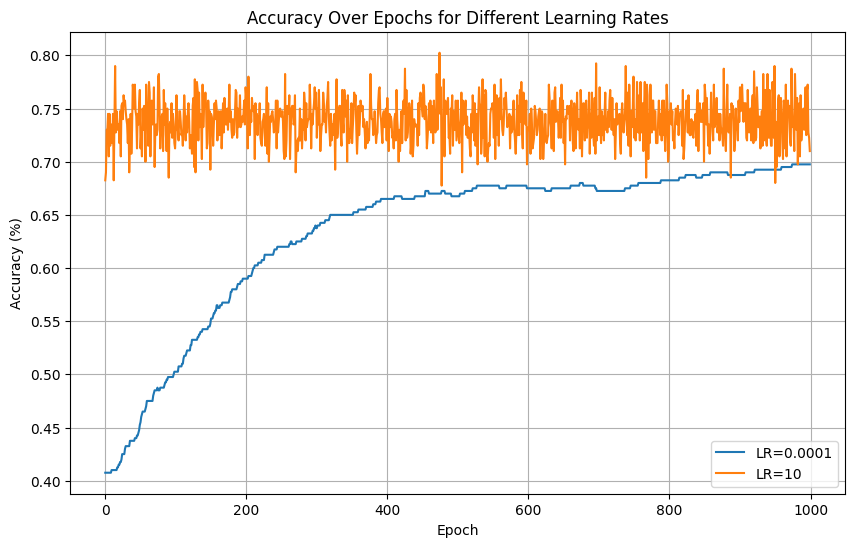

In [222]:
import matplotlib.pyplot as plt

# Example: Using the modified callback
learning_rates = [0.0001, 10]

# Lists to store results for plotting
accuracies = {lr: [] for lr in learning_rates}

for lr in learning_rates:
    print(f"Training with Learning Rate: {lr}")

    model = model_return(lr)

    # Attach the custom callback to the fit method
    callback = tf.keras.callbacks.History()
    history = model.fit(X_train_scaled, Y_train_encode, epochs=1000, verbose=0, callbacks=[callback], validation_data=(X_test_scaled, Y_test_encode))

    # Retrieve accuracy for all epochs
    accuracies[lr] = callback.history['accuracy']

# Plotting
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(accuracies[lr], label=f'LR={lr}')

plt.title('Accuracy Over Epochs for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


From the above results we can notice that-
1. On too low learning rate, we will require a lot more epochs(hence more time) to reach peak accuracy possible also here can of sudden change in accuracy is almost negligible
2. When it's too high, we might see quick maximization of accuracy and then overfitting might happen for higher epochs

<ipython-input-223-70e7464d2381>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


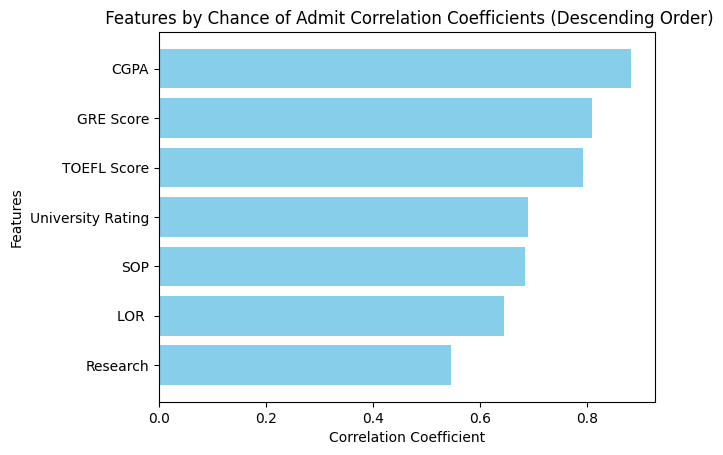

In [223]:
# Determine correlation coefficients between all variables and the target
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Chance of Admit '].drop(['Serial No.', 'Chance of Admit '])

# Sort features by absolute correlation coefficient values in descending order
sorted_features = correlation_with_target.abs().nlargest(7).index
sorted_features = sorted_features[::-1]  # Reverse the order
sorted_correlation_values = correlation_with_target[sorted_features]

# Create a horizontal bar graph
plt.barh(sorted_features, sorted_correlation_values.values, color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title(' Features by Chance of Admit Correlation Coefficients (Descending Order)')
plt.show()


Here the top features are - CGPA, GRE Score, TOEFL Score, University Ranking, SOP, LOR, Research (descending order)

In [224]:
features_data = data.drop(['Chance of Admit ','Serial No.','Admission_Level'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def model_return(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model_return(0.01)

class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) == 1000:
            accuracy = logs.get('accuracy')
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Accuracy using top 7 params: {accuracy * 100:.2f}%')

model = model_return(0.01)

# Attach the custom callback to the fit method
history = model.fit(X_train_scaled, Y_train_encode, epochs=1000, verbose=0, callbacks=[PrintAccuracy()], validation_data=(X_test_scaled, Y_test_encode))

features_data = data.drop(['Chance of Admit ','Serial No.','Admission_Level', 'Research'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def model_return(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model_return(0.01)

class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) == 1000:
            accuracy = logs.get('accuracy')
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Accuracy using top 6 params: {accuracy * 100:.2f}%')

model = model_return(0.01)

# Attach the custom callback to the fit method
history = model.fit(X_train_scaled, Y_train_encode, epochs=1000, verbose=0, callbacks=[PrintAccuracy()], validation_data=(X_test_scaled, Y_test_encode))

features_data = data.drop(['Chance of Admit ','Serial No.','Admission_Level', 'Research', 'LOR '],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def model_return(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model_return(0.01)

class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1)  == 1000:
            accuracy = logs.get('accuracy')
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Accuracy using top 5 params: {accuracy * 100:.2f}%')

model = model_return(0.01)

# Attach the custom callback to the fit method
history = model.fit(X_train_scaled, Y_train_encode, epochs=1000, verbose=0, callbacks=[PrintAccuracy()], validation_data=(X_test_scaled, Y_test_encode))

features_data = data.drop(['Chance of Admit ','Serial No.','Admission_Level', 'Research', 'LOR ', 'SOP' ],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def model_return(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model_return(0.01)

class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1)  == 1000:
            accuracy = logs.get('accuracy')
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Accuracy using top 4 params: {accuracy * 100:.2f}%')

model = model_return(0.01)

# Attach the custom callback to the fit method
history = model.fit(X_train_scaled, Y_train_encode, epochs=1000, verbose=0, callbacks=[PrintAccuracy()], validation_data=(X_test_scaled, Y_test_encode))

features_data = data.drop(['Chance of Admit ','Serial No.','Admission_Level', 'Research', 'LOR ','SOP','University Rating'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def model_return(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model_return(0.01)

class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1)  == 1000:
            accuracy = logs.get('accuracy')
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Accuracy using top 3 params: {accuracy * 100:.2f}%')

model = model_return(0.01)

# Attach the custom callback to the fit method
history = model.fit(X_train_scaled, Y_train_encode, epochs=1000, verbose=0, callbacks=[PrintAccuracy()], validation_data=(X_test_scaled, Y_test_encode))


Epoch 1000/1000, Accuracy using top 7 params: 81.75%
Epoch 1000/1000, Accuracy using top 6 params: 81.75%
Epoch 1000/1000, Accuracy using top 5 params: 80.25%
Epoch 1000/1000, Accuracy using top 4 params: 79.50%
Epoch 1000/1000, Accuracy using top 3 params: 79.00%


In [225]:
features_data = data.drop(['Chance of Admit ','Serial No.','Admission_Level', 'Research', 'LOR ','SOP','University Rating', 'TOEFL Score'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def model_return(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model_return(0.01)

class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1)  == 1000:
            accuracy = logs.get('accuracy')
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Accuracy using top 2 params: {accuracy * 100:.2f}%')

model = model_return(0.01)

# Attach the custom callback to the fit method
history = model.fit(X_train_scaled, Y_train_encode, epochs=1000, verbose=0, callbacks=[PrintAccuracy()], validation_data=(X_test_scaled, Y_test_encode))


Epoch 1000/1000, Accuracy using top 2 params: 78.75%


In [226]:
features_data = data.drop(['Chance of Admit ','Serial No.','Admission_Level', 'Research', 'LOR ','SOP','University Rating', 'TOEFL Score', 'GRE Score'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(features_data, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def model_return(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model_return(0.01)

class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1)  == 1000:
            accuracy = logs.get('accuracy')
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Accuracy using top 1 params: {accuracy * 100:.2f}%')

model = model_return(0.01)

# Attach the custom callback to the fit method
history = model.fit(X_train_scaled, Y_train_encode, epochs=1000, verbose=0, callbacks=[PrintAccuracy()], validation_data=(X_test_scaled, Y_test_encode))


Epoch 1000/1000, Accuracy using top 1 params: 76.00%


So Accuracy

Epoch 1000/1000, Accuracy using top 7 params: 81.75%

Epoch 1000/1000, Accuracy using top 6 params: 81.75%

Epoch 1000/1000, Accuracy using top 5 params: 80.25%

Epoch 1000/1000, Accuracy using top 4 params: 79.50%

Epoch 1000/1000, Accuracy using top 3 params: 79.00%

Epoch 1000/1000, Accuracy using top 2 params: 78.75%

Epoch 1000/1000, Accuracy using top 1 params: 76.00%

  Accuracy decreases as number of features taken decreases

In [234]:
# TASK3

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score

# Load the dataset
df= pd.read_csv("/content/Admission_Predict_A3.csv")
X = df.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

linear_reg_mse = []
logistic_reg_accuracy = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_tensor = tf.constant(X_train, dtype=tf.float32)
    y_train_tensor=tf.constant(y_train.values.reshape(-1,1), dtype=tf.float32)
    X_test_tensor= tf.constant(X_test, dtype=tf.float32)
    y_test_tensor=tf.constant(y_test.values.reshape(-1,1), dtype=tf.float32)

    # Linear Regression
    # Define the linear regression model
    weights = tf.Variable(tf.random.normal(shape=(X_train.shape[1], 1)))
    bias = tf.Variable(tf.random.normal(shape=(1,)), name='bias')

    # Define the linear regression function
    def linear_regression(X):
        return tf.matmul(X, weights) + bias

    # Define the mean squared error loss function
    def mean_squared_error_loss(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    # Stochastic Gradient Descent (SGD) optimizer
    optimizer = tf.optimizers.SGD(learning_rate=0.1)

    # Training loop
    epochs = 1000
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = linear_regression(X_train_tensor)
            loss = mean_squared_error_loss(y_train_tensor, y_pred)
        gradients = tape.gradient(loss, [weights, bias])
        optimizer.apply_gradients(zip(gradients, [weights, bias]))

    # Evaluate the model
    y_pred_test = linear_regression(X_test_tensor)
    mse = mean_squared_error(y_test_tensor, y_pred_test)
    linear_reg_mse.append(mse)

    # Logistic Regression
    y_train_category = pd.cut(y_train, bins=[0.3, 0.5, 0.7, 1], labels=[0, 1, 2])
    y_test_category = pd.cut(y_test, bins=[0.3, 0.5, 0.7, 1], labels=[0, 1, 2])

    logistic_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes for low, medium, and high
    ])
    logistic_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    logistic_model.fit(X_train, y_train_category, epochs=1000, verbose=0)
    y_pred_category = np.argmax(logistic_model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test_category, y_pred_category)
    logistic_reg_accuracy.append(accuracy)

print(f'Linear Regression Mean Squared Error: {np.mean(linear_reg_mse)}')
print(f'Logistic Regression Accuracy: {np.mean(logistic_reg_accuracy)}')


4/4 [==============================] - 0s 3ms/step
Linear Regression Mean Squared Error: 0.003705492941662669
Logistic Regression Accuracy: 0.796


K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time. Performance metrics from each fold are averaged to estimate the model's generalization performance.

 The linear regression results with k-fold validation gave the MSE of
*** where as the straight forward train, test split method gave the **,

 The logistic regression results with k-fold validation gave the MSE of *** where as the straight forward train, test split method gave the ** this shows there is very less difference in the result because of the small dataset. But the with K-fold it gave bit better results because This method ensures the model's effectiveness across different data subsets, enhances reliability.


In [236]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Assuming the necessary libraries and functions are already imported

# Binning and Labeling (Simplified for Binary Classification)
bin_edges = [0.0, 0.5, 1]  # Adjusted bin edges for binary classification
bin_labels = [0, 1]    # Adjusted bin labels for binary classification
data['Admission_Level'] = pd.cut(data['Chance of Admit '], bins=bin_edges, labels=bin_labels, include_lowest=True)
features_data = data.drop(['Chance of Admit ', 'Serial No.', 'Admission_Level'], axis=1)

# Features and Target Variable
y = data['Admission_Level']
X_train, X_test, Y_train, Y_test = train_test_split(features_data, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variables to binary values for binary crossentropy
Y_train_binary = Y_train.astype(int)
Y_test_binary = Y_test.astype(int)

def model_return(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
    ])
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = model_return(0.01)

class PrintAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 50 == 0:
            accuracy = logs.get('accuracy')
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Accuracy: {accuracy * 100:.2f}%')

model = model_return(0.01)

# Attach the custom callback to the fit method
history = model.fit(X_train_scaled, Y_train_binary, epochs=1000, verbose=0, callbacks=[PrintAccuracy()], validation_data=(X_test_scaled, Y_test_binary))


Epoch 50/1000, Accuracy: 93.00%
Epoch 100/1000, Accuracy: 93.50%
Epoch 150/1000, Accuracy: 93.50%
Epoch 200/1000, Accuracy: 93.50%
Epoch 250/1000, Accuracy: 94.25%
Epoch 300/1000, Accuracy: 94.50%
Epoch 350/1000, Accuracy: 94.50%
Epoch 400/1000, Accuracy: 94.75%
Epoch 450/1000, Accuracy: 95.00%
Epoch 500/1000, Accuracy: 95.00%
Epoch 550/1000, Accuracy: 95.25%
Epoch 600/1000, Accuracy: 95.25%
Epoch 650/1000, Accuracy: 95.25%
Epoch 700/1000, Accuracy: 95.25%
Epoch 750/1000, Accuracy: 95.25%
Epoch 800/1000, Accuracy: 95.25%
Epoch 850/1000, Accuracy: 95.25%
Epoch 900/1000, Accuracy: 94.75%
Epoch 950/1000, Accuracy: 94.75%
Epoch 1000/1000, Accuracy: 94.75%


In [ ]:
Sigmoid gave better results because of lesser classification number
(Might Over fit)